# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [98]:
!pip install wget
!pip install twython
import wget


In [99]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
!pip install tqdm
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk
nltk.download('punkt')
## Download Resources
nltk.download("vader_lexicon")#identify emotion rule-based not learned
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
import pandas as pd
## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
reviewDF=pd.read_csv("reviews.csv")
reviewDF.columns=['file','hotel name','review','rating','sentiment']

In [101]:
reviewDF.head()

,file,hotel name,review,rating,sentiment
0,data\ca\155019\155495\682627838.html,Fairmont Royal York,"""I was there to celebrate my daughters 30th Bi...",5,positive
1,data\ca\155019\155495\682656607.html,Fairmont Royal York,"""Very central location, very sizeable hotel, b...",3,negative
2,data\ca\155019\155495\682676167.html,Fairmont Royal York,"""We got to the hotel pretty late, around 6pm a...",5,positive
3,data\ca\155019\155495\682872848.html,Fairmont Royal York,"""My family had the most relaxed stay at Fairmo...",5,positive
4,data\ca\155019\155495\683051089.html,Fairmont Royal York,"""We came to the Royal York to attend our son's...",1,negative


In [102]:
reviewDF['hotel name'].unique()

array(['Fairmont Royal York', 'Hotel Victoria', 'Hyatt Regency Toronto',
       'InterContinental Toronto Centre', 'Cambridge Suites Toronto',
       'Sheraton Centre Toronto Hotel', 'Hilton Toronto',
       'The Strathcona Hotel', 'The Ritz-Carlton, Toronto',
       'The St. Regis Toronto', 'Le Germain Hotel Toronto Mercer',
       'Shangri-La Hotel Toronto', 'The Beverley Hotel',
       'One King West Hotel &amp; Residence',
       'Residence Inn Toronto Downtown/Entertainment District',
       'Delta Hotels by Marriott Toronto',
       'Holiday Inn Express Hotel &amp; Suites',
       'Novotel Toronto Vaughan Centre',
       'Extended Stay Canada - Toronto - Vaughan',
       'Homewood Suites by Hilton Toronto Vaughan',
       'SpringHill Suites Toronto Vaughan', 'Aloft Vaughan Mills',
       'Courtyard Toronto Vaughan', 'Element Vaughan Southwest',
       'Monte Carlo Inn Vaughan Suites',
       'Hilton Garden Inn Toronto/Vaughan',
       'Residence Inn Toronto Vaughan', 'Liberty Sui

#**Q1**. Sentiment Analysis and Aggregation

###(a)

In [0]:
def evalText(text, to_df=False, columns=[]):
  sid = SentimentIntensityAnalyzer()
  pdlist = []
  if to_df:
      for sentence in tqdm(text):
          ss = sid.polarity_scores(sentence)
          pdlist.append([sentence]+[ss['compound']])
      reviewDf = pandas.DataFrame(pdlist)
      reviewDf.columns = columns
      return reviewDf
    
  else:
      for sentence in tqdm(text):
          print(sentence)
          ss = sid.polarity_scores(sentence)
          for k in sorted(ss):
              print('{0}: {1}, '.format(k, ss[k]), end='')
          print()


In [104]:
reviewText=reviewDF['review'].values
vaderDF=evalText(reviewText, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 5157/5157 [00:06<00:00, 788.45it/s]


In [105]:
vaderDF.head()

,reviewCol,vader
0,"""I was there to celebrate my daughters 30th Bi...",0.9818
1,"""Very central location, very sizeable hotel, b...",0.8370
2,"""We got to the hotel pretty late, around 6pm a...",0.8500
3,"""My family had the most relaxed stay at Fairmo...",0.9785
4,"""We came to the Royal York to attend our son's...",-0.3493


In [0]:
reviewDF['vader']=vaderDF['vader']

In [107]:
reviewDF.head()

,file,hotel name,review,rating,sentiment,vader
0,data\ca\155019\155495\682627838.html,Fairmont Royal York,"""I was there to celebrate my daughters 30th Bi...",5,positive,0.9818
1,data\ca\155019\155495\682656607.html,Fairmont Royal York,"""Very central location, very sizeable hotel, b...",3,negative,0.8370
2,data\ca\155019\155495\682676167.html,Fairmont Royal York,"""We got to the hotel pretty late, around 6pm a...",5,positive,0.8500
3,data\ca\155019\155495\682872848.html,Fairmont Royal York,"""My family had the most relaxed stay at Fairmo...",5,positive,0.9785
4,data\ca\155019\155495\683051089.html,Fairmont Royal York,"""We came to the Royal York to attend our son's...",1,negative,-0.3493


In [108]:
hotelList=reviewDF['hotel name'].unique()
print(type(hotelList))

<class 'numpy.ndarray'>


In [0]:
def averageVader(reviewDF,hotelList):
  results={}
  for item in hotelList:
    itemMean=reviewDF.loc[reviewDF['hotel name']==item,'vader'].mean()
    results[item]=itemMean
  return results

def averageGroundTruth(reviewDF,hotelList):
  results={}
  for item in hotelList:
    itemMean=reviewDF.loc[reviewDF['hotel name']==item,'rating'].mean()
    results[item]=itemMean
  return results

In [110]:
meanVader=averageVader(reviewDF,hotelList)
sorted_meanVader = sorted(meanVader.items(), key=operator.itemgetter(1))
print(sorted_meanVader)

[('Super 8 by Wyndham Toronto North', 0.4414619999999999), ('Monte Carlo Inn Vaughan Suites', 0.633039), ('Hilton Garden Inn Toronto/Vaughan', 0.6620854999999995), ('Hyatt Regency Toronto', 0.6840360000000003), ('Liberty Suites Hotel', 0.6930644628099172), ('Courtyard Toronto Vaughan', 0.7025479999999998), ('Vaughan Inn', 0.7168125), ('Extended Stay Canada - Toronto - Vaughan', 0.7299289999999999), ('The Beverley Hotel', 0.7426484210526315), ('SpringHill Suites Toronto Vaughan', 0.7446214999999999), ('Novotel Toronto Vaughan Centre', 0.7572675), ('Sheraton Centre Toronto Hotel', 0.7688285), ('Hilton Toronto', 0.7773699999999997), ('Residence Inn Toronto Downtown/Entertainment District', 0.7819140000000003), ('Cambridge Suites Toronto', 0.7832079999999999), ('Residence Inn Toronto Vaughan', 0.7840546762589926), ('InterContinental Toronto Centre', 0.7937050000000005), ('Homewood Suites by Hilton Toronto Vaughan', 0.8027194999999999), ('Fairmont Royal York', 0.8068414201183436), ('Hotel V

In [111]:
meanTruth=averageGroundTruth(reviewDF,hotelList)
sorted_meanTruth = sorted(meanTruth.items(), key=operator.itemgetter(1))
print(sorted_meanTruth)

[('Super 8 by Wyndham Toronto North', 3.335), ('The Beverley Hotel', 3.610526315789474), ('Courtyard Toronto Vaughan', 3.72), ('Monte Carlo Inn Vaughan Suites', 3.79), ('Vaughan Inn', 3.8125), ('Hilton Garden Inn Toronto/Vaughan', 3.865), ('Liberty Suites Hotel', 3.9338842975206614), ('Hilton Toronto', 4.045), ('Extended Stay Canada - Toronto - Vaughan', 4.065), ('Cambridge Suites Toronto', 4.1), ('Hyatt Regency Toronto', 4.155), ('Residence Inn Toronto Downtown/Entertainment District', 4.16), ('Sheraton Centre Toronto Hotel', 4.17), ('Residence Inn Toronto Vaughan', 4.18705035971223), ('Novotel Toronto Vaughan Centre', 4.21), ('SpringHill Suites Toronto Vaughan', 4.21), ('Hotel Victoria', 4.266666666666667), ('Holiday Inn Express Hotel &amp; Suites', 4.307228915662651), ('InterContinental Toronto Centre', 4.385), ('Fairmont Royal York', 4.414201183431953), ('Homewood Suites by Hilton Toronto Vaughan', 4.42), ('Element Vaughan Southwest', 4.456989247311828), ('Aloft Vaughan Mills', 4.4

###(b)

In [112]:
print(sorted_meanVader[-5:])
print(sorted_meanTruth[-5:])
print(sorted_meanVader[:5])
print(sorted_meanTruth[:5])

[('One King West Hotel &amp; Residence', 0.8595835294117646), ('Aloft Vaughan Mills', 0.8602324999999996), ('The Ritz-Carlton, Toronto', 0.8614105000000002), ('Delta Hotels by Marriott Toronto', 0.8679365000000006), ('The St. Regis Toronto', 0.8714914999999999)]
[('The St. Regis Toronto', 4.64), ('Le Germain Hotel Toronto Mercer', 4.64), ('The Ritz-Carlton, Toronto', 4.69), ('One King West Hotel &amp; Residence', 4.694117647058824), ('Shangri-La Hotel Toronto', 4.745)]
[('Super 8 by Wyndham Toronto North', 0.4414619999999999), ('Monte Carlo Inn Vaughan Suites', 0.633039), ('Hilton Garden Inn Toronto/Vaughan', 0.6620854999999995), ('Hyatt Regency Toronto', 0.6840360000000003), ('Liberty Suites Hotel', 0.6930644628099172)]
[('Super 8 by Wyndham Toronto North', 3.335), ('The Beverley Hotel', 3.610526315789474), ('Courtyard Toronto Vaughan', 3.72), ('Monte Carlo Inn Vaughan Suites', 3.79), ('Vaughan Inn', 3.8125)]


Some of the rankings aggree with each other, but not all of them.

#Q2

###(a)

In [0]:
reviewSeries=reviewDF['review']
stop_words = set(stopwords.words('english')) 
reviewSeries=reviewSeries.apply(lambda data: nltk.word_tokenize(data))
reviewSeries=reviewSeries.apply(lambda x: [item for item in x if item not in stop_words])
reviewSeries=reviewSeries.apply(lambda x: [item for item in x if item.isalpha()])
reviewSeries=reviewSeries.apply(lambda x: ' '.join(x))
reviewSeries=reviewSeries.str.lower()

In [0]:
reviewDF['review']=reviewSeries

In [0]:
pos_Reviews=reviewDF.loc[reviewDF['rating']>3,'review']
neg_Reviews=reviewDF.loc[reviewDF['rating']<=3,'review']

In [116]:
print(pos_Reviews.shape,neg_Reviews.shape,reviewDF.shape)

(4207,) (950,) (5157, 6)


In [117]:
reviewDF.head()

,file,hotel name,review,rating,sentiment,vader
0,data\ca\155019\155495\682627838.html,Fairmont Royal York,i celebrate daughters birthday they wonderful ...,5,positive,0.9818
1,data\ca\155019\155495\682656607.html,Fairmont Royal York,very central location sizeable hotel bit old f...,3,negative,0.8370
2,data\ca\155019\155495\682676167.html,Fairmont Royal York,we got hotel pretty late around stoping niagar...,5,positive,0.8500
3,data\ca\155019\155495\682872848.html,Fairmont Royal York,my family relaxed stay fairmont hotel staff en...,5,positive,0.9785
4,data\ca\155019\155495\683051089.html,Fairmont Royal York,we came royal york attend son wedding held sat...,1,negative,-0.3493


In [0]:
def getMostKwords(reviewDF,k):
  counter=Counter()
  for item in reviewDF:
    #print(item)
    counter.update([word for word in re.findall(r'\w+', item)]) 
  topList=[]
  topk=counter.most_common(k)
  #print(topk)
  for item in topk:
    topList.append(item[0])

  return topList

In [0]:
neg_Reviews=neg_Reviews.values

pos_Reviews=pos_Reviews.values
neg_list=getMostKwords(neg_Reviews,50)
pos_list=getMostKwords(pos_Reviews,50)

In [120]:
print(neg_list)
print(pos_list)

['i', 'room', 'hotel', 'the', 'would', 'stay', 'we', 'one', 'staff', 'night', 'breakfast', 'rooms', 'desk', 'front', 'good', 'us', 'get', 'nice', 'could', 'like', 'stayed', 'bed', 'time', 'told', 'back', 'service', 'also', 'clean', 'location', 'even', 'it', 'great', 'well', 'small', 'area', 'said', 'check', 'this', 'day', 'floor', 'go', 'two', 'bathroom', 'asked', 'really', 'people', 'booked', 'first', 'toronto', 'next']
['i', 'hotel', 'the', 'room', 'great', 'staff', 'stay', 'we', 'clean', 'breakfast', 'good', 'rooms', 'would', 'toronto', 'nice', 'location', 'service', 'stayed', 'friendly', 'well', 'us', 'comfortable', 'one', 'area', 'also', 'it', 'time', 'desk', 'pool', 'front', 'helpful', 'night', 'close', 'this', 'really', 'excellent', 'bed', 'could', 'get', 'definitely', 'everything', 'like', 'recommend', 'food', 'back', 'place', 'restaurant', 'check', 'walk', 'parking']


Some words appeared both in positive and negative list, I suppose that may be caused by sometimes customers judge the service of the hotel base on these common terms, like if they like the room the hotel they probably mention that in their positive review, but if they dislike the room they are likely to mention that in reviews as well, so the two list shared some common words for ranking a hotel.

###(b)

In [0]:
def topkNP_Extraction(review,k):
  grammar = "NP: {<DT>?<JJ>*<NN>}"
  parser = nltk.RegexpParser(grammar)
  tokenizer=RegexpTokenizer(r'\w+')
  noun_phrases_list =[]
  for item in review:
    words = tokenizer.tokenize(item)
    pos_words=nltk.pos_tag(words)
    result = parser.parse(pos_words)
    for subtree in result.subtrees(filter = lambda t: t.label()=='NP'):
      npString=[]
      if len(subtree.leaves())==1:
        continue
      for leaf in subtree.leaves():
        npString.append(leaf[0])
      npWord=' '.join(npString)
      noun_phrases_list.append(npWord)
  counter=Counter()
  counter.update(noun_phrases_list)
  topk=counter.most_common(k)
  return topk


In [0]:
posNP_List=topkNP_Extraction(pos_Reviews,50)

In [123]:
posNP_List

[('the hotel', 533),
 ('the room', 455),
 ('the staff', 403),
 ('this hotel', 235),
 ('great location', 227),
 ('the location', 181),
 ('the breakfast', 139),
 ('front desk', 125),
 ('friendly staff', 119),
 ('the pool', 106),
 ('great hotel', 105),
 ('the bed', 98),
 ('the service', 96),
 ('first time', 86),
 ('the bathroom', 83),
 ('great service', 82),
 ('hot tub', 81),
 ('the front', 80),
 ('the lobby', 78),
 ('free breakfast', 72),
 ('good location', 68),
 ('nice hotel', 64),
 ('top notch', 64),
 ('next time', 62),
 ('great place', 60),
 ('great staff', 59),
 ('the food', 57),
 ('clean staff', 57),
 ('canada wonderland', 57),
 ('easy access', 56),
 ('excellent service', 50),
 ('every time', 50),
 ('short walk', 49),
 ('full kitchen', 49),
 ('all staff', 46),
 ('great room', 45),
 ('great breakfast', 44),
 ('excellent location', 42),
 ('good size', 42),
 ('perfect location', 40),
 ('great view', 40),
 ('great stay', 39),
 ('the restaurant', 38),
 ('recommend hotel', 37),
 ('good br

In [0]:
negNP_List=topkNP_Extraction(neg_Reviews,50)

In [125]:
negNP_List

[('front desk', 101),
 ('the hotel', 97),
 ('the room', 92),
 ('the staff', 66),
 ('this hotel', 44),
 ('great location', 36),
 ('the location', 29),
 ('another room', 27),
 ('the front', 27),
 ('the bathroom', 25),
 ('next time', 23),
 ('the pool', 23),
 ('another hotel', 22),
 ('hot water', 22),
 ('the bed', 21),
 ('the breakfast', 21),
 ('hot tub', 21),
 ('next day', 20),
 ('nice hotel', 19),
 ('good location', 19),
 ('free breakfast', 19),
 ('speak manager', 18),
 ('next door', 17),
 ('first time', 16),
 ('every time', 16),
 ('the service', 14),
 ('general manager', 14),
 ('stay hotel', 13),
 ('the lobby', 12),
 ('big deal', 12),
 ('the restaurant', 11),
 ('clean room', 11),
 ('friendly staff', 11),
 ('no one', 11),
 ('hard time', 11),
 ('new room', 11),
 ('late night', 11),
 ('long time', 10),
 ('good thing', 10),
 ('last night', 10),
 ('the next day', 9),
 ('the price', 9),
 ('high tea', 9),
 ('next morning', 8),
 ('clean staff', 8),
 ('second night', 8),
 ('the toilet', 8),
 ('s

From the noun phrases we can more clearly see the trend in the reviews, but interesting some 'positive phrases' tends to appear in negative review, for example we can see 'great location' and 'nice hotel' in the negative phrase and by looking into the reviews I found that sometimes people comment things like 'It is a nice hotel but....' or 'Although it has a great location, however...'. Thus, I understand that we cannot simply judge the sentiment from some simply words or phrases but also need to consider the words or phrases around them.

# Q3

###(a)

In [0]:
reviewDF['sentiment']=reviewDF['sentiment'].replace('positive',1)
reviewDF['sentiment']=reviewDF['sentiment'].replace('negative',0)

In [127]:
reviewDF.head()

,file,hotel name,review,rating,sentiment,vader
0,data\ca\155019\155495\682627838.html,Fairmont Royal York,i celebrate daughters birthday they wonderful ...,5,1,0.9818
1,data\ca\155019\155495\682656607.html,Fairmont Royal York,very central location sizeable hotel bit old f...,3,0,0.8370
2,data\ca\155019\155495\682676167.html,Fairmont Royal York,we got hotel pretty late around stoping niagar...,5,1,0.8500
3,data\ca\155019\155495\682872848.html,Fairmont Royal York,my family relaxed stay fairmont hotel staff en...,5,1,0.9785
4,data\ca\155019\155495\683051089.html,Fairmont Royal York,we came royal york attend son wedding held sat...,1,0,-0.3493


In [0]:
top500_Words=getMostKwords(reviewDF['review'],500)
#print(top500_Words[:10])
def judgeExistence(topk,review,hotelDf):
  freqReview = []
  for item in review:
    #print(item)
    tempCounter = Counter()
    tempCounter.update([word for word in re.findall(r'\w+', item)])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for word in topk]
    freqReview.append(topkinReview)
  freqReviewDf = pandas.DataFrame(freqReview)
  dfName = []
  for c in topk:
    dfName.append(c)
  #print(dfName[:10])
  freqReviewDf.columns = dfName
  finaldf = hotelDf[['hotel name','rating','sentiment','review']].join(freqReviewDf)
  return finaldf

In [0]:
finaldf=judgeExistence(top500_Words,reviewDF['review'],reviewDF)

In [130]:
finaldf.head()

,hotel name,rating,sentiment,review,i,hotel,the,room,staff,stay,great,we,breakfast,clean,would,good,rooms,nice,toronto,location,service,stayed,one,us,well,friendly,night,desk,comfortable,also,front,it,area,time,get,bed,could,pool,this,like,...,menu,reservation,table,variety,aquarium,safe,whole,upgrade,greeted,internet,doors,least,loud,after,probably,complaint,hour,david,game,waiting,order,cost,request,either,major,entertainment,residence,later,daughter,york,forward,past,makes,children,tried,son,just,soon,line,attentive
0,Fairmont Royal York,5,1,i celebrate daughters birthday they wonderful ...,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fairmont Royal York,3,0,very central location sizeable hotel bit old f...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fairmont Royal York,5,1,we got hotel pretty late around stoping niagar...,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fairmont Royal York,5,1,my family relaxed stay fairmont hotel staff en...,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fairmont Royal York,1,0,we came royal york attend son wedding held sat...,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [0]:
# get Top K mutual information terms from the dataframe, X is word Y is label(groundtruth) distance measure, either way is okay
def getMI(k,df,topk):
    miScore = []
    for term in topk:
      miScore.append([term]+[metrics.mutual_info_score(df['sentiment'], df[term])])

    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    miScoredf=miScoredf[:k]
    return miScoredf

In [0]:

topkMI=getMI(50,finaldf,top500_Words)

In [133]:
topkMI

,Word,MI Score
118,told,0.025272
6,great,0.020263
142,said,0.017522
218,called,0.014254
141,asked,0.013013
213,when,0.011402
22,night,0.011133
272,call,0.010959
126,however,0.010632
21,friendly,0.010272


The top ranked words by MI are mostly verbs and adj and nouns and the adjs are more sentimentive than most of the adjs.

###(b)

In [0]:
top500_NP=topkNP_Extraction(reviewDF['review'],500)
np500_list=[]
for item in top500_NP:
  np500_list.append(item[0])

In [0]:
def np_JudgeExistence(topk,review,hotelDf):
  freqReview = []
  grammar = "NP: {<DT>?<JJ>*<NN>}"
  parser = nltk.RegexpParser(grammar)
  tokenizer=RegexpTokenizer(r'\w+')

  for item in review:
    #print(item)
    words = tokenizer.tokenize(item)
    pos_words=nltk.pos_tag(words)
    result = parser.parse(pos_words)
    noun_phrases_list =[]
    for subtree in result.subtrees(filter = lambda t: t.label()=='NP'):
      npString=[]
      if len(subtree.leaves())==1:
        continue
      for leaf in subtree.leaves():
        npString.append(leaf[0])
      npWord=' '.join(npString)
      noun_phrases_list.append(npWord)


    tempCounter = Counter()
    tempCounter.update([word for word in noun_phrases_list])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for word in topk]
    freqReview.append(topkinReview)
  freqReviewDf = pandas.DataFrame(freqReview)
  dfName = []
  for c in topk:
    dfName.append(c)
  #print(dfName[:10])
  freqReviewDf.columns = dfName
  finaldf = hotelDf[['hotel name','rating','sentiment','review']].join(freqReviewDf)
  return finaldf


In [0]:
np_FinalDF=np_JudgeExistence(np500_list,reviewDF['review'],reviewDF)

In [137]:
np_FinalDF.head(10)

,hotel name,rating,sentiment,review,the hotel,the room,the staff,this hotel,great location,front desk,the location,the breakfast,friendly staff,the pool,the bed,the service,the bathroom,great hotel,the front,first time,hot tub,free breakfast,the lobby,good location,great service,next time,nice hotel,top notch,every time,clean staff,the food,great staff,great place,canada wonderland,easy access,full kitchen,excellent service,short walk,the restaurant,stay hotel,...,tim horton,helpful hotel,easy check,excellent i,hyatt regency,average hotel,first day,friendly location,recent stay,excellent place,this property,every room,intercontinental toronto,perfect hotel,early room,shampoo conditioner,extra charge,nespresso machine,side street,the building,the management,the person,fantastic room,helpful kind,lake view,top line,excellent breakfast,clean front,key card,clean comfy,great size,the complaint,the sheraton,full breakfast,late evening,big smile,the noise,great rate,middle night,live music
0,Fairmont Royal York,5,1,i celebrate daughters birthday they wonderful ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fairmont Royal York,3,0,very central location sizeable hotel bit old f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fairmont Royal York,5,1,we got hotel pretty late around stoping niagar...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fairmont Royal York,5,1,my family relaxed stay fairmont hotel staff en...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fairmont Royal York,1,0,we came royal york attend son wedding held sat...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fairmont Royal York,4,1,we stayed friends first part canadian holiday ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fairmont Royal York,5,1,stayed nights hotel clean room level huge staf...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fairmont Royal York,2,0,this review culmination two experiences fairmo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fairmont Royal York,4,1,i neutral updates the lounge middle lobby inte...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fairmont Royal York,4,1,great location harbour front cn corner room fl...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
topk_NPMI=getMI(50,np_FinalDF,np500_list)

In [139]:
topk_NPMI

,Word,MI Score
5,front desk,0.006010
137,speak manager,0.004571
64,another hotel,0.003359
246,hard time,0.002678
42,another room,0.002670
220,no one,0.002614
13,great hotel,0.002508
47,next day,0.001901
44,excellent location,0.001666
213,the next day,0.001560


From the noun phrases list we can see the majority of the them are terms that the customers care about the most.

# Q4

###(a)

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in [1,0]:
        for j in [0,1]:
            px = sum(df['sentiment']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['sentiment']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='sentiment'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
def pmiForAllCal(df, topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word]+[pmiCal(df,word)])
        pmiposlist.append([word]+[pmiIndivCal(df,word,1,'sentiment')])
        pmineglist.append([word]+[pmiIndivCal(df,word,0,'sentiment')])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [143]:
# Compute PMI for all terms and all possible labels
pmiposlist, pmineglist, pmidf=pmiForAllCal(finaldf, top500_Words)

100%|██████████| 500/500 [00:18<00:00, 27.43it/s]


In [144]:
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
477,david,0.179214
162,loved,0.170815
128,wonderful,0.169065
187,highly,0.165865
308,accommodating,0.163254
189,fantastic,0.162949
391,thanks,0.157085
97,perfect,0.156037
133,enjoyed,0.155901
82,amazing,0.153415


In [145]:
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
118,told,1.232782
436,paid,1.119129
272,call,1.115558
218,called,1.112911
142,said,1.112126
350,someone,1.084268
434,phone,1.034869
388,card,1.028354
452,management,1.017919
471,least,1.016201


PMI analysis result showed some difference from the MI, in the positive list the first ranked was a name 'David' and I looked into the dataset and found he was a staff at Toronto Inter Hotel and he had great performance at his work so many customers mentioned him in their reviews which are mostly positive, the reason perhaps is PMI focus on single pair not the entire dataset.

###(b)

In [146]:
np_Pmiposlist, np_Pmineglist, np_Pmidf=pmiForAllCal(np_FinalDF, np500_list)

100%|██████████| 500/500 [00:16<00:00, 31.04it/s]


In [147]:
np_Pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
186,beautiful room,0.203605
93,great value,0.203605
499,live music,0.203605
332,small hotel,0.203605
283,outside hotel,0.203605
286,great selection,0.203605
287,happy stay,0.203605
288,attentive staff,0.203605
292,special mention,0.203605
151,next trip,0.203605


In [148]:
np_Pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
137,speak manager,1.631024
246,hard time,1.596338
444,next room,1.537498
220,no one,1.524594
392,different hotel,1.403966
382,bad i,1.403966
284,the toilet,1.373195
498,middle night,1.355176
465,average hotel,1.355176
496,the noise,1.355176


One interesting outcome is in noun phrases you hardly see any negative phrases in positive reviews but the positive phrases still appears in negative reviews. In addition, compared to MI, the rank of these positive phrases are lower in the neg_list compared with MI.

###(c)

In [0]:
# Simple example of getting pairwise mutual information of a term
def single_pmiCal(df, x):
    pmilist=[]
    for i in [1,0]:
        for j in [0,1]:
            px = sum(df['sentiment']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['sentiment']==i) & (df[x]==j)])/len(df)
            if px==0 or py==0:
              pmi=0
              pxy=0
              pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
              continue
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

def single_pmiIndivCal(df,x,gt, label_column='sentiment'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if px==0 or py==0:
      pmi=0
      return pmi
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

def single_pmiForAllCal(df, topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word]+[single_pmiCal(df,word)])
        pmiposlist.append([word]+[single_pmiIndivCal(df,word,1,'sentiment')])
        pmineglist.append([word]+[single_pmiIndivCal(df,word,0,'sentiment')])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:

shangrila_Review=finaldf[finaldf['hotel name']=='Shangri-La Hotel Toronto']
super8_Review=finaldf[finaldf['hotel name']=='Super 8 by Wyndham Toronto North']

In [151]:
shangrila_Review.head()

,hotel name,rating,sentiment,review,i,hotel,the,room,staff,stay,great,we,breakfast,clean,would,good,rooms,nice,toronto,location,service,stayed,one,us,well,friendly,night,desk,comfortable,also,front,it,area,time,get,bed,could,pool,this,like,...,menu,reservation,table,variety,aquarium,safe,whole,upgrade,greeted,internet,doors,least,loud,after,probably,complaint,hour,david,game,waiting,order,cost,request,either,major,entertainment,residence,later,daughter,york,forward,past,makes,children,tried,son,just,soon,line,attentive
2024,Shangri-La Hotel Toronto,5,1,excellent service helpful friendly really enjo...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2025,Shangri-La Hotel Toronto,5,1,i stayed many five star hotels numerous cities...,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2026,Shangri-La Hotel Toronto,2,0,got married restaurant across street decided s...,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2027,Shangri-La Hotel Toronto,5,1,pleasure stay toronto service decor amazing al...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2028,Shangri-La Hotel Toronto,5,1,outstanding service added touches beautiful sp...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
shangrila_pmiposlist, shangrila_pmineglist, shangrila_pmidf=single_pmiForAllCal(shangrila_Review, top500_Words)

100%|██████████| 500/500 [00:08<00:00, 59.75it/s]


In [153]:
shangrila_pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
499,attentive,0.05657
373,beyond,0.05657
275,needs,0.05657
150,tv,0.05657
82,amazing,0.05657
81,business,0.05657
80,view,0.05657
268,gym,0.05657
267,side,0.05657
384,tea,0.05657


In [154]:
shangrila_pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
314,ritz,2.900422
483,either,2.900422
469,internet,2.900422
443,point,2.900422
393,issues,2.389596
476,hour,2.207275
300,bad,2.207275
303,towels,2.207275
312,housekeeping,2.207275
313,deal,2.207275


In [155]:
super_pmiposlist, super_pmineglist, super_pmidf=single_pmiForAllCal(super8_Review, top500_Words)

100%|██████████| 500/500 [00:08<00:00, 61.20it/s]


In [156]:
super_pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
322,efficient,0.634878
391,thanks,0.634878
383,travel,0.634878
358,delicious,0.634878
326,marriott,0.634878
70,bar,0.634878
311,wife,0.634878
281,but,0.634878
279,attractions,0.634878
258,short,0.634878


In [157]:
super_pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
472,loud,0.755023
346,pay,0.755023
349,kept,0.755023
350,someone,0.755023
351,hear,0.755023
372,air,0.755023
253,you,0.755023
223,wedding,0.755023
491,past,0.755023
378,elevators,0.755023


From the list we can tell that shangeri la has merits of good big custom room and modern equipments but some customers may complained about the internet and the temperature.
For super 8 hotel, it benefits are well entertainments and club easy to travel, but it is also complained about noise.

# #Q5

###(a)Histogram

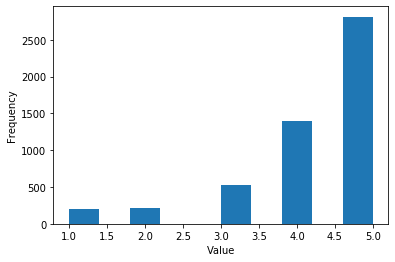

In [158]:
plt.hist(reviewDF['rating'].values)

plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

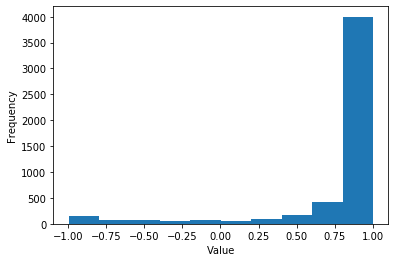

In [159]:
plt.hist(vaderDF['vader'].values)

plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

The distribution of Vader prediction is more concentrated around 0.75 to 1 than ground truth.

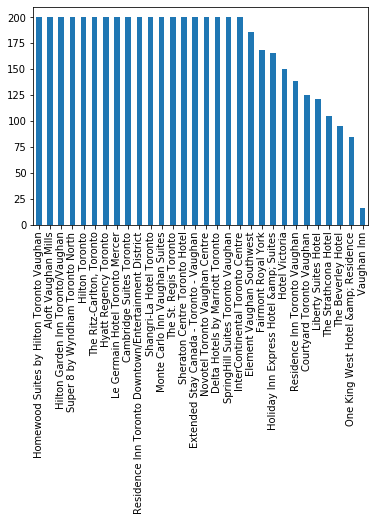

In [160]:
rates=reviewDF['hotel name'].value_counts().plot(kind = 'bar')

Since I implemented a constrain on the max review number retrived from a single hotel, the max review number for a single hotel is 200. From the histogram we can see that the hotels that are close to Toronto has more reviews than hotels that are far away from Toronto and it is within my expectation.

###(b)Boxplots

In [0]:
import seaborn as sns
vaderHotel_Name,values=zip(*sorted_meanVader)
top5Vader=vaderHotel_Name[-5:]

trueHotel_Name,truevalues=zip(*sorted_meanTruth)
top5True=trueHotel_Name[-5:]

In [0]:
vader_Data=[]
true_Data=[]
for hotel in top5Vader:
  hotelData=reviewDF.loc[reviewDF['hotel name']==hotel,'rating']
  
  vader_Data.append(hotelData)

for hotel in top5True:
  hotelData=reviewDF.loc[reviewDF['hotel name']==hotel,'rating']
  true_Data.append(hotelData)

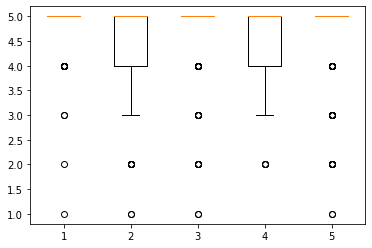

In [163]:
plt.figure()
plt.boxplot(vader_Data)
plt.show()

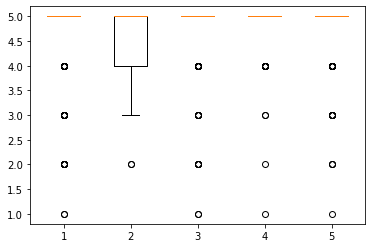

In [164]:
plt.figure()
plt.boxplot(true_Data)
plt.show()

In [165]:
top5True

('The St. Regis Toronto',
 'Le Germain Hotel Toronto Mercer',
 'The Ritz-Carlton, Toronto',
 'One King West Hotel &amp; Residence',
 'Shangri-La Hotel Toronto')

In [166]:
variance_true=[]
variance_vader=[]
mean_true=[]
mean_vader=[]
for item in true_Data:
  ar=item.values
  v=np.var(ar)
  m=np.mean(ar)
  variance_true.append(v)
  mean_true.append(m)
for item in vader_Data:
  ar=item.values
  v=np.var(ar)
  m=np.mean(ar)
  variance_vader.append(v)
  mean_vader.append(m)
print(variance_vader)
print(variance_true)
print(mean_vader)
print(mean_true)

[0.4711418685121109, 0.759375, 0.5739, 0.522775, 0.6903999999999999]
[0.6903999999999999, 0.4003999999999999, 0.5739, 0.4711418685121109, 0.40997500000000003]
[4.694117647058824, 4.475, 4.69, 4.585, 4.64]
[4.64, 4.64, 4.69, 4.694117647058824, 4.745]


From my perspective, the mean and variance is better than boxplot because it is more precise and makes the compare easier, but the boxplot shows the trend more straight forward.


>Hotel Name|Vader-Mean |Vader-Variance|Ground Truth-Mean|Ground Truth-Variance
>--- | --- | ---| ---| ---
>The St. Regis Toronto | 4.694117647058824|0.4711418685121109|4.64|0.6903999999999999
>Le Germain Hotel Toronto Mercer| 4.475|0.759375|4.64|0.4003999999999999
>The Ritz-Carlton, Toronto | 4.69|0.5739|4.69|0.5739
>One King West Hotel &amp; Residence |4.585 |0.522775|4.694117647058824|0.4711418685121109
>Shangri-La Hotel Toronto |4.64|0.6903999999999999|4.745|0.40997500000000003

###(c)Scatterplots and heatmaps

####(a)

Text(0.5, 0, 'Vader Score')

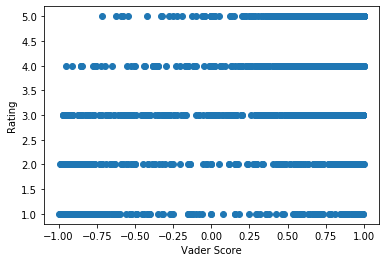

In [167]:
y = reviewDF['rating'].values
x = reviewDF['vader'].values
plt.plot(x,y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')


The nodes are concentrated on both ends,which means the rating and predictions are tends to be extreme.

Star ratings vs. Vader tells me the relation between the rating and prediction. We can see that the left upper corner which means rating is high but predicted as negative is sparse means the Vader rarely predict a very positive review as totally negative but the right lower corner is dense which means Vader sometimes predict the negative reviews as the positive ones.

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

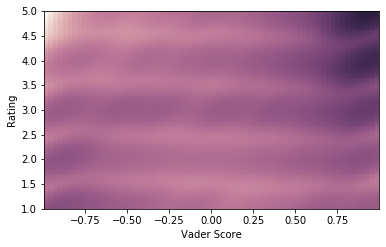

In [169]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')


The trend is similar to the scatter plot with both dense ends and sparse in left upper corner.

####(b)

In [0]:
length_List=[]
for item in reviewDF['review'].values:
  length=len(item)
  length_List.append(length)
reviewDF['length']=length_List

In [171]:
reviewDF.head()

,file,hotel name,review,rating,sentiment,vader,length
0,data\ca\155019\155495\682627838.html,Fairmont Royal York,i celebrate daughters birthday they wonderful ...,5,1,0.9818,164
1,data\ca\155019\155495\682656607.html,Fairmont Royal York,very central location sizeable hotel bit old f...,3,0,0.8370,143
2,data\ca\155019\155495\682676167.html,Fairmont Royal York,we got hotel pretty late around stoping niagar...,5,1,0.8500,170
3,data\ca\155019\155495\682872848.html,Fairmont Royal York,my family relaxed stay fairmont hotel staff en...,5,1,0.9785,181
4,data\ca\155019\155495\683051089.html,Fairmont Royal York,we came royal york attend son wedding held sat...,1,0,-0.3493,655


Text(0.5, 0, 'Vader Score')

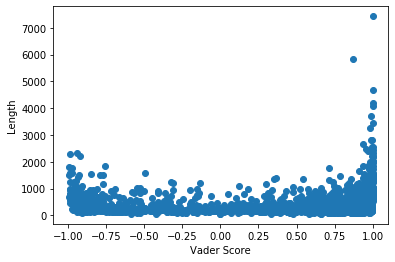

In [172]:
y = reviewDF['length'].values
x = reviewDF['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Length')
plt.xlabel('Vader Score')

Text(0.5, 0, 'Rating Score')

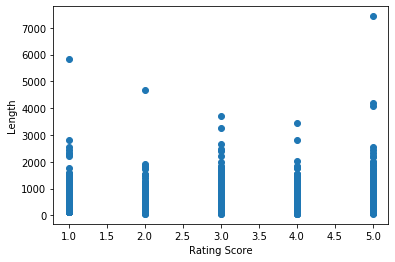

In [173]:
y = reviewDF['length'].values
x = reviewDF['rating'].values
plt.plot(x, y,"o")
plt.ylabel('Length')
plt.xlabel('Rating Score')

Text(0, 0.5, 'Rating')

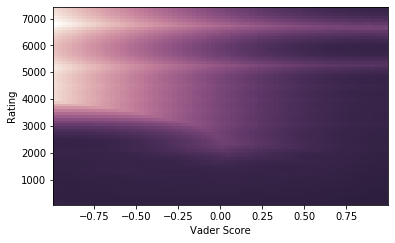

In [174]:
y = reviewDF['length'].values
x = reviewDF['vader'].values
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

Text(0, 0.5, 'Rating')

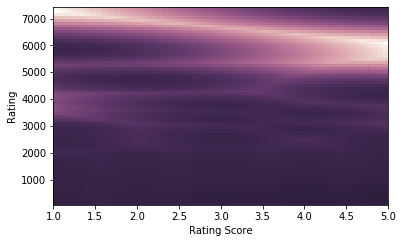

In [175]:
y = reviewDF['length'].values
x = reviewDF['rating'].values
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())

ax1.set_xlabel('Rating Score')
ax1.set_ylabel('Rating')

Highly positive reviews and highly negative reviews tends to have more length and the neutral reviews (like3) has the sortest length of reviews.

####(c)

In [0]:
rateNum=reviewDF['hotel name'].value_counts()
mean_VaderList=[]
for item in sorted_meanVader:
  mean_VaderList.append(item[1])
mean_TrueList=[]
for item in sorted_meanTruth:
  mean_TrueList.append(item[1])

Text(0.5, 0, 'Rating Score')

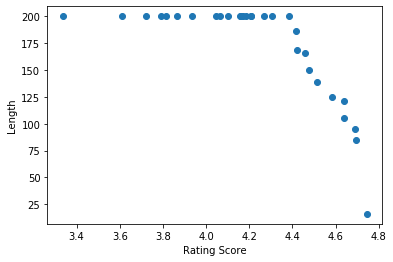

In [177]:
y = rateNum.values
x = mean_TrueList
plt.plot(x, y,"o")
plt.ylabel('Length')
plt.xlabel('Rating Score')

Text(0.5, 0, 'Vader Score')

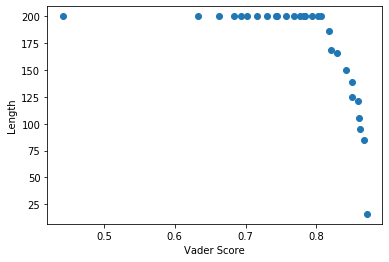

In [178]:
y = rateNum.values
x = mean_VaderList
plt.plot(x, y,"o")
plt.ylabel('Length')
plt.xlabel('Vader Score')

Vader prediction is more concentrated than the true rating distribution.